In [1]:
from HeaderP import *


In [53]:
from os.path import exists
import io
colnames = ['oid','expid','hjd','mjd','mag','magerr','catflags','filtercode',
                     'ra','dec','chi','sharp','filefracday','field','ccdid','qid','limitmag','magzp',
                     'magzprms','clrcoeff','clrcounc','exptime','airmass','programid']
import requests
def download_ztf_archive_lightcurves(ra, dec, objids=[], sr=0.001, lcout=False):
    ra = str(ra)
    dec = str(dec)
    sr = str(sr)
    
    if exists(f"./lc/ra_{ra}_dec_{dec}_sr_{sr}.pkl"):
        mainlc = pd.read_pickle(f"./lc/ra_{ra}_dec_{dec}_sr_{sr}.pkl")
    else:
        url1 = "https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?POS=CIRCLE "
        url2 = f"{ra} {dec} {sr}&BANDNAME=r&NOBS_MIN=30&BAD_CATFLAGS_MASK=32768&FORMAT=ipac_table"
        url = url1 + url2


        r = requests.get(url)

        urlData = r.content

        mainlc = pd.read_table(io.StringIO(urlData.decode('utf-8')),
                              delim_whitespace=True, skiprows=54, names=colnames)
        mainlc.to_pickle(f"./lc/ra_{ra}_dec_{dec}_sr_{sr}.pkl")
    
    return mainlc

In [118]:
querylc = download_ztf_archive_lightcurves(19.734459, 31.213142)


In [119]:
querylc = querylc.loc[querylc['oid'] == 650201100000697]
querylc

,oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,...,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid
0,650201100000697,52246388,2.458277e+06,58276.463889,15.596002,0.011292,0,zr,19.734428,31.213182,...,1,1,20.049999,25.989697,0.031309,0.086502,0.000012,30,1.861,1
1,650201100000697,52847709,2.458283e+06,58282.477095,15.596486,0.011293,0,zr,19.734464,31.213140,...,1,1,20.010000,25.557819,0.038937,0.109340,0.000019,30,1.527,1
2,650201100000697,53446546,2.458289e+06,58288.465463,15.594187,0.011289,0,zr,19.734459,31.213140,...,1,1,20.209999,26.041956,0.034746,0.107331,0.000015,30,1.487,1
3,650201100000697,53746858,2.458292e+06,58291.468588,15.598558,0.011296,0,zr,19.734453,31.213146,...,1,1,21.090000,26.065556,0.022165,0.093385,0.000006,30,1.402,1
4,650201100000697,54048196,2.458295e+06,58294.481968,15.587734,0.011278,0,zr,19.734453,31.213140,...,1,1,20.620001,26.071564,0.028796,0.093934,0.000010,30,1.273,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,650201100000697,177215206,2.459527e+06,59526.152060,15.600160,0.011299,0,zr,19.734455,31.213131,...,1,1,21.420000,26.174858,0.021159,0.095936,0.000006,30,1.110,1
425,650201100000697,177520576,2.459530e+06,59529.205764,15.600785,0.011300,0,zr,19.734452,31.213138,...,1,1,21.250000,26.187715,0.019904,0.090314,0.000005,30,1.008,1
426,650201100000697,177723663,2.459532e+06,59531.236632,15.621765,0.011336,0,zr,19.734452,31.213142,...,1,1,20.940001,26.194471,0.022518,0.095604,0.000006,30,1.002,1
427,650201100000697,178426487,2.459539e+06,59538.264873,15.627898,0.011347,0,zr,19.734463,31.213136,...,1,1,20.780001,26.198925,0.027831,0.091230,0.000010,30,1.051,1


In [223]:
result = pd.read_parquet("osg/ztf_000202_zr_c10_q1_dr10.parquet", engine="pyarrow")
result2 = pd.read_parquet("ztf_000650_zr_c01_q1_dr10.parquet", engine="pyarrow")


In [164]:
result2['avemag'] = [np.mean(result2.iloc[i]['mag']) for i in range(len(result2))]

In [169]:
np.mean(result2.iloc[0]['mag'])

19.038717

In [196]:
result['lcnumb'] = [len(result.iloc[i]['mag']) for i in range(len(result))]

In [198]:
result

,objectid,filterid,fieldid,rcid,objra,objdec,nepochs,hmjd,mag,magerr,clrcoeff,catflags,lcnumb
2,202210100000002,2,202,36,25.628220,-29.596437,45,"[59128.38208, 59134.3181, 59147.31784, 59150.2...","[16.944195, 16.944994, 16.921227, 16.969093, 1...","[0.038, 0.022, 0.034, 0.038, 0.039, 0.046, 0.0...","[0.16456337, 0.13910884, 0.11809983, 0.1043577...","[32768, 32768, 32768, 32768, 32768, 32768, 327...",45
3,202210100000003,2,202,36,25.396152,-29.600176,27,"[59128.38208, 59134.31811, 59150.27799, 59165....","[19.687698, 19.43487, 19.435562, 20.008066, 19...","[0.357, 0.144, 0.245, 0.191, 0.145, 0.162, 0.2...","[0.16456337, 0.13910884, 0.10435772, 0.0929288...","[32768, 32768, 32768, 32768, 32768, 32768, 327...",27
4,202210100000004,2,202,36,25.354692,-29.600838,9,"[59134.31811, 59166.29178, 59195.19103, 59463....","[20.0934, 20.4768, 20.385012, 20.144619, 20.44...","[0.317, 0.335, 0.26, 0.255, 0.157, 0.314, 0.18...","[0.13910884, 0.12331432, 0.10794431, 0.0980193...","[32768, 32768, 32768, 32768, 32768, 32768, 327...",9
5,202210100000005,2,202,36,25.333885,-29.601740,3,"[59189.212, 59219.12646, 59453.46387]","[20.554462, 20.747355, 20.128317]","[0.258, 0.347, 0.337]","[0.09625683, 0.12370285, 0.13257669]","[32768, 32768, 32768]",3
7,202210100000007,2,202,36,25.640556,-29.597708,4,"[59189.21201, 59459.46555, 59463.401, 59488.33...","[20.602793, 20.587486, 20.437864, 20.707989]","[0.355, 0.202, 0.271, 0.359]","[0.09625683, 0.09831645, 0.09801938, 0.0862013]","[32768, 32768, 32768, 32768]",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24221,202210100024221,2,202,36,25.512018,-29.656183,18,"[59138.31863, 59153.31875, 59165.2383, 59168.2...","[19.580566, 18.97643, 19.41717, 19.421173, 18....","[0.124, 0.282, 0.1, 0.157, 0.277, 0.298, 0.139...","[0.12319774, 0.1632901, 0.09292881, 0.09429199...","[32768, 32768, 32768, 32768, 32768, 32768, 327...",18
24225,202210100024225,2,202,36,25.792948,-29.640003,11,"[59128.38207, 59138.31863, 59165.23831, 59166....","[18.814394, 18.964031, 18.834694, 19.017996, 1...","[0.171, 0.087, 0.088, 0.107, 0.127, 0.082, 0.0...","[0.16456337, 0.12319774, 0.09292881, 0.1233143...","[32768, 32768, 32768, 32768, 32768, 32768, 327...",11
24229,202210100024229,2,202,36,25.718090,-29.717690,1,[59165.23831],[20.788464],[0.311],[0.09292881],[32768],1
24232,202210100024232,2,202,36,25.950417,-29.811432,5,"[59153.31874, 59166.29178, 59219.1265, 59463.4...","[18.64098, 19.048712, 19.026606, 18.450628, 18...","[0.181, 0.147, 0.09, 0.075, 0.091]","[0.1632901, 0.12331432, 0.12370285, 0.09801938...","[32768, 32768, 32768, 32768, 32768]",5


In [190]:
onstar = result2.iloc[0]
pd.DataFrame(np.array((onstar['hmjd'],onstar['mag'],onstar['magerr'],onstar['catflags'])).T, 
             columns = ['mjd','mag','magerr','flag'])

,mjd,mag,magerr,flag
0,58276.46028,18.795904,0.051778,0.0
1,58282.47389,19.039392,0.061955,0.0
2,58288.46271,18.866747,0.054543,0.0
3,58291.46607,19.025364,0.061316,0.0
4,58294.47969,18.989376,0.059706,0.0
...,...,...,...,...
331,59526.15738,19.093767,0.064498,0.0
332,59529.21099,19.154919,0.067483,0.0
333,59531.24180,18.950523,0.058017,0.0
334,59538.26976,19.209156,0.070244,0.0


In [146]:
len(result2['hmjd'][0])

336

485


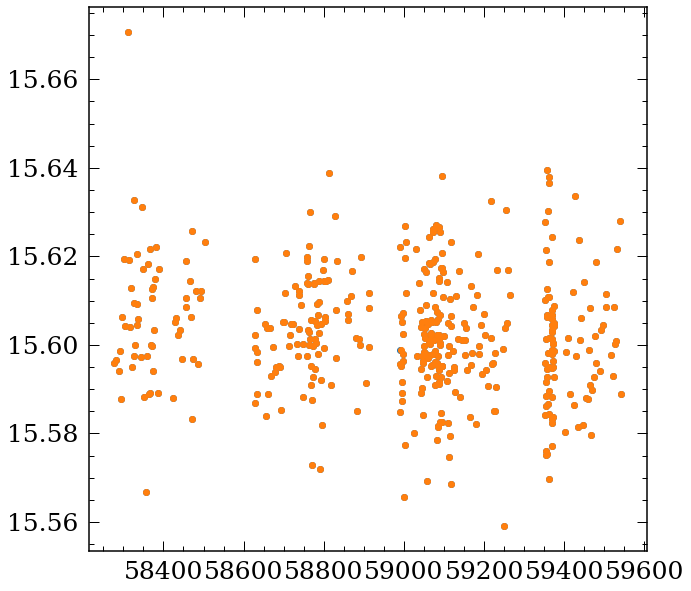

In [214]:
i = 697
#plt.plot(result['hmjd'][i], result['mag'][i], 'o')
print(len(result2['hmjd'][i]))
m = result2['catflags'][i] == 0
plt.plot(result2['hmjd'][i][m], result2['mag'][i][m], 'o')

plt.plot(querylc['mjd'],querylc['mag'],'o')

In [112]:
alllen = np.zeros(len(result2['hmjd']))
allinds = result2.index.values
for i in range(len(result2['hmjd'])):
    alllen[i] =  len(result2['hmjd'][allinds[i]])
    

In [113]:
max(alllen)


485.0

In [116]:
allinds[np.argmax(alllen)],np.argmax(alllen)

(697, 585)

In [117]:
result2.iloc[585]

objectid                                      650201100000697
filterid                                                    2
fieldid                                                   650
rcid                                                        0
objra                                               19.734459
objdec                                              31.213142
nepochs                                                   485
hmjd        [58276.46027, 58282.47389, 58288.4627, 58291.4...
mag         [15.596002, 15.596486, 15.594187, 15.598558, 1...
magerr      [0.0112918, 0.011292616, 0.011288745, 0.011296...
clrcoeff    [0.08650216, 0.109340146, 0.10733149, 0.093385...
catflags    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 697, dtype: object

# get all downloadlinks

In [129]:
ztflist = pd.read_table('osg/checksum.md5.txt', delim_whitespace=True, names=['id','file'])

In [133]:
filenames = [i for i in ztflist['file'] if 'zr' in i]


In [141]:
filenames[0].split('./')[1]

'0/field000202/ztf_000202_zr_c10_q1_dr10.parquet'

In [142]:
filenames = ['https://irsa.ipac.caltech.edu/data/ZTF/lc_dr10/'+i.split('./')[1] for i in filenames]


In [213]:
#f = open('osg/lclist', 'w+')
nbfile = int(np.ceil(len(filenames)/5000))
count = 0
for j in range(nbfile):
    f = open('osg/lclist'+str(j), 'w+')
    if j == (nbfile-1):
        for i in range(5000):
            print(j)
            print(count)
            if count == len(filenames)-1: 
                print(count)
                break
            else:
                f.write(filenames[count]+'\n')
                count = count+1
        
    else:
        for i in range(5000):
            f.write(filenames[count]+'\n')
            count = count + 1

13
65000
13
65001
13
65002
13
65003
13
65004
13
65005
13
65006
13
65007
13
65008
13
65009
13
65010
13
65011
13
65012
13
65013
13
65014
13
65015
13
65016
13
65017
13
65018
13
65019
13
65020
13
65021
13
65022
13
65023
13
65024
13
65025
13
65026
13
65027
13
65028
13
65029
13
65030
13
65031
13
65032
13
65033
13
65034
13
65035
13
65036
13
65037
13
65038
13
65039
13
65040
13
65041
13
65042
13
65043
13
65044
13
65045
13
65046
13
65047
13
65048
13
65049
13
65050
13
65051
13
65052
13
65053
13
65054
13
65055
13
65056
13
65057
13
65058
13
65059
13
65060
13
65061
13
65062
13
65063
13
65064
13
65065
13
65066
13
65067
13
65068
13
65069
13
65070
13
65071
13
65072
13
65073
13
65074
13
65075
13
65076
13
65077
13
65078
13
65079
13
65080
13
65081
13
65082
13
65083
13
65084
13
65085
13
65086
13
65087
13
65088
13
65089
13
65090
13
65091
13
65092
13
65093
13
65094
13
65095
13
65096
13
65097
13
65098
13
65099
13
65100
13
65101
13
65102
13
65103
13
65104
13
65105
13
65106
13
65107
13
65108
13
65109
13
65110
1

66306
13
66307
13
66308
13
66309
13
66310
13
66311
13
66312
13
66313
13
66314
13
66315
13
66316
13
66317
13
66318
13
66319
13
66320
13
66321
13
66322
13
66323
13
66324
13
66325
13
66326
13
66327
13
66328
13
66329
13
66330
13
66331
13
66332
13
66333
13
66334
13
66335
13
66336
13
66337
13
66338
13
66339
13
66340
13
66341
13
66342
13
66343
13
66344
13
66345
13
66346
13
66347
13
66348
13
66349
13
66350
13
66351
13
66352
13
66353
13
66354
13
66355
13
66356
13
66357
13
66358
13
66359
13
66360
13
66361
13
66362
13
66363
13
66364
13
66365
13
66366
13
66367
13
66368
13
66369
13
66370
13
66371
13
66372
13
66373
13
66374
13
66375
13
66376
13
66377
13
66378
13
66379
13
66380
13
66381
13
66382
13
66383
13
66384
13
66385
13
66386
13
66387
13
66388
13
66389
13
66390
13
66391
13
66392
13
66393
13
66394
13
66395
13
66396
13
66397
13
66398
13
66399
13
66400
13
66401
13
66402
13
66403
13
66404
13
66405
13
66406
13
66407
13
66408
13
66409
13
66410
13
66411
13
66412
13
66413
13
66414
13
66415
13
66416
13
6

13
67399
13
67400
13
67401
13
67402
13
67403
13
67404
13
67405
13
67406
13
67407
13
67408
13
67409
13
67410
13
67411
13
67412
13
67413
13
67414
13
67415
13
67416
13
67417
13
67418
13
67419
13
67420
13
67421
13
67422
13
67423
13
67424
13
67425
13
67426
13
67427
13
67428
13
67429
13
67430
13
67431
13
67432
13
67433
13
67434
13
67435
13
67436
13
67437
13
67438
13
67439
13
67440
13
67441
13
67442
13
67443
13
67444
13
67445
13
67446
13
67447
13
67448
13
67449
13
67450
13
67451
13
67452
13
67453
13
67454
13
67455
13
67456
13
67457
13
67458
13
67459
13
67460
13
67461
13
67462
13
67463
13
67464
13
67465
13
67466
13
67467
13
67468
13
67469
13
67470
13
67471
13
67472
13
67473
13
67474
13
67475
13
67476
13
67477
13
67478
13
67479
13
67480
13
67481
13
67482
13
67483
13
67484
13
67485
13
67486
13
67487
13
67488
13
67489
13
67490
13
67491
13
67492
13
67493
13
67494
13
67495
13
67496
13
67497
13
67498
13
67499
13
67500
13
67501
13
67502
13
67503
13
67504
13
67505
13
67506
13
67507
13
67508
13
67509
1

68648
13
68649
13
68650
13
68651
13
68652
13
68653
13
68654
13
68655
13
68656
13
68657
13
68658
13
68659
13
68660
13
68661
13
68662
13
68663
13
68664
13
68665
13
68666
13
68667
13
68668
13
68669
13
68670
13
68671
13
68672
13
68673
13
68674
13
68675
13
68676
13
68677
13
68678
13
68679
13
68680
13
68681
13
68682
13
68683
13
68684
13
68685
13
68686
13
68687
13
68688
13
68689
13
68690
13
68691
13
68692
13
68693
13
68694
13
68695
13
68696
13
68697
13
68698
13
68699
13
68700
13
68701
13
68702
13
68703
13
68704
13
68705
13
68706
13
68707
13
68708
13
68709
13
68710
13
68711
13
68712
13
68713
13
68714
13
68715
13
68716
13
68717
13
68718
13
68719
13
68720
13
68721
13
68722
13
68723
13
68724
13
68725
13
68726
13
68727
13
68728
13
68729
13
68730
13
68731
13
68732
13
68733
13
68734
13
68735
13
68736
13
68737
13
68738
13
68739
13
68740
13
68741
13
68742
13
68743
13
68744
13
68745
13
68746
13
68747
13
68748
13
68749
13
68750
13
68751
13
68752
13
68753
13
68754
13
68755
13
68756
13
68757
13
68758
13
6

In [212]:
len(filenames)-1

69324

In [201]:
nbfile

14

In [220]:
sum(((result2['objra']-19.626911)**2+(result2['objdec']-31.277748)**2 - (4/60)**2)<0)

205

In [222]:
result2

,objectid,filterid,fieldid,rcid,objra,objdec,nepochs,hmjd,mag,magerr,clrcoeff,catflags
0,650201100000000,2,650,0,19.626911,31.277748,336,"[58276.46028, 58282.47389, 58288.46271, 58291....","[18.795904, 19.039392, 18.866747, 19.025364, 1...","[0.05177826, 0.061955277, 0.054543164, 0.06131...","[0.08650216, 0.109340146, 0.10733149, 0.093385...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,650201100000001,2,650,0,19.862562,31.270506,375,"[58276.46026, 58282.47388, 58288.46269, 58291....","[18.006266, 17.944967, 18.00729, 18.027388, 17...","[0.029794866, 0.028634327, 0.029814795, 0.0302...","[0.08650216, 0.109340146, 0.10733149, 0.093385...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,650201100000002,2,650,0,19.875092,31.269762,71,"[58303.46606, 58310.45237, 58316.46631, 58319....","[21.010788, 20.818817, 21.160679, 21.187994, 2...","[0.20407176, 0.18923914, 0.21565306, 0.2177636...","[0.09036555, 0.11797762, 0.09488397, 0.0859443...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,650201100000003,2,650,0,19.922338,31.268291,295,"[58276.46026, 58282.47387, 58288.46268, 58291....","[19.599854, 19.720757, 19.83737, 19.713411, 19...","[0.093437344, 0.10181503, 0.11041024, 0.101290...","[0.08650216, 0.109340146, 0.10733149, 0.093385...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,650201100000004,2,650,0,19.867132,31.269960,358,"[58276.46026, 58282.47388, 58288.46269, 58291....","[18.97565, 18.998688, 18.874214, 18.913662, 18...","[0.059103742, 0.060118455, 0.054843698, 0.0564...","[0.08650216, 0.109340146, 0.10733149, 0.093385...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
40715,650201100040715,2,650,0,19.601940,30.644955,1,[58893.13101],[13.045845],[0.010615123],[0.09572513],[33024]
40716,650201100040716,2,650,0,20.378506,30.958380,21,"[58358.42986, 58367.3855, 58373.45612, 58763.3...","[19.9747, 20.208628, 20.165766, 20.088745, 19....","[0.121119745, 0.14044324, 0.13683575, 0.130412...","[0.09799371, 0.083128296, 0.08876727, 0.097004...","[0, 0, 0, 0, 0, 32768, 0, 32768, 0, 0, 0, 0, 0..."
40717,650201100040717,2,650,0,20.097248,30.404911,193,"[58276.46025, 58291.46605, 58349.46884, 58352....","[16.35884, 16.400637, 16.42036, 16.384281, 16....","[0.013361561, 0.013532747, 0.013616171, 0.0134...","[0.08650216, 0.09338528, 0.08447012, 0.0885773...","[0, 0, 0, 0, 32768, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
40718,650201100040718,2,650,0,20.062321,31.238361,2,"[59064.42623, 59090.49338]","[17.928303, 19.288395]","[0.028329633, 0.074472874]","[0.09584613, 0.09963619]","[0, 0]"
